In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN

In [372]:
data = pd.read_csv('created_data.csv' )

In [373]:
data.head(8)

,timestamp,id,x_position,y_position,unique_id,sensor_id
0,1,1,93.352391,80.996056,126,A
1,1,2,13.385339,42.089827,126,B
2,1,3,32.250739,80.710509,348,C
3,1,4,12.592112,6.673242,348,D
4,1,5,30.227652,68.301050,126,E
5,2,6,26.601653,92.354588,0,A
6,2,7,90.365384,29.860966,0,B
7,2,8,5.565432,46.160197,348,C


### Preprocessing the data

In [374]:
data.isna().sum()

timestamp     0
id            0
x_position    0
y_position    0
unique_id     0
sensor_id     0
dtype: int64

**We Don't have missing values still we will impute and drop data if incompletness is there**

In [375]:
data = data.dropna()

In [376]:
num_imputer = SimpleImputer(strategy = "mean")

In [377]:
num_features = ["x_position" , "y_position"]
imputer = ColumnTransformer([("num_imputer" , num_imputer , num_features)])
imputed = imputer.fit_transform(data)
imputed
data_new = pd.DataFrame(imputed , columns= ["x_position" , "y_position" ])
data_new

,x_position,y_position
0,93.352391,80.996056
1,13.385339,42.089827
2,32.250739,80.710509
3,12.592112,6.673242
4,30.227652,68.301050
5,26.601653,92.354588
6,90.365384,29.860966
7,5.565432,46.160197
8,64.853502,29.392658
9,19.127350,41.943065


**We are not performing one hot encoding becaus there is not noed of it as the data is not in categorical format.**

In [378]:
data

,timestamp,id,x_position,y_position,unique_id,sensor_id
0,1,1,93.352391,80.996056,126,A
1,1,2,13.385339,42.089827,126,B
2,1,3,32.250739,80.710509,348,C
3,1,4,12.592112,6.673242,348,D
4,1,5,30.227652,68.301050,126,E
5,2,6,26.601653,92.354588,0,A
6,2,7,90.365384,29.860966,0,B
7,2,8,5.565432,46.160197,348,C
8,2,9,64.853502,29.392658,0,D
9,2,10,19.127350,41.943065,0,E


In [379]:
x_y_data = data[['x_position', 'y_position']].values
x_y_stand = StandardScaler().fit_transform(x_y_data)

In [380]:
x_y_stand

array([[ 2.00479663,  1.29093646],
       [-0.95391898, -0.14197678],
       [-0.25591458,  1.28041977],
       [-0.98326771, -1.44636671],
       [-0.33076715,  0.82338042],
       [-0.46492616,  1.70927026],
       [ 1.89427983, -0.59236474],
       [-1.24324914,  0.0079346 ],
       [ 0.95036103, -0.60961247],
       [-0.74146924, -0.147382  ],
       [ 0.28959362,  0.31050773],
       [ 0.26387099,  0.89203574],
       [ 0.07369631, -1.22687   ],
       [ 1.09949811, -1.53749189],
       [-0.45442842, -1.12866735],
       [-0.13867854, -1.56891022],
       [-1.39920567,  0.51111153],
       [-1.40082419,  1.12708257],
       [ 0.96364686,  0.4579648 ],
       [ 0.8269064 , -0.0110017 ]])

### Visualization 

In [381]:
label_encoder = LabelEncoder()
data['sensor_id_numeric'] = label_encoder.fit_transform(data['sensor_id'])
data['sensor_id_numeric']

0     0
1     1
2     2
3     3
4     4
5     0
6     1
7     2
8     3
9     4
10    0
11    1
12    2
13    3
14    4
15    0
16    1
17    2
18    3
19    4
Name: sensor_id_numeric, dtype: int32

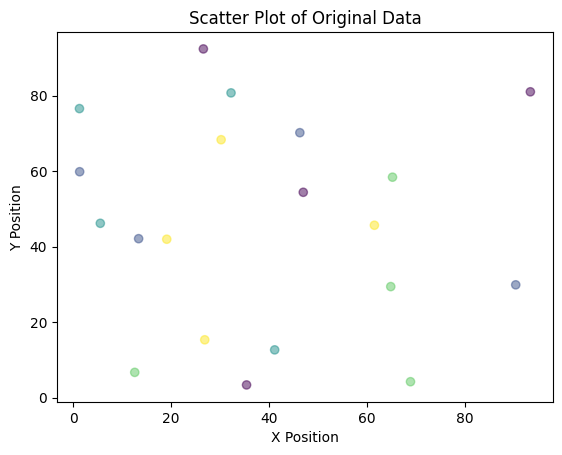

In [382]:
plt.scatter(data['x_position'], data['y_position'], c=data['sensor_id_numeric'], cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of Original Data')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()

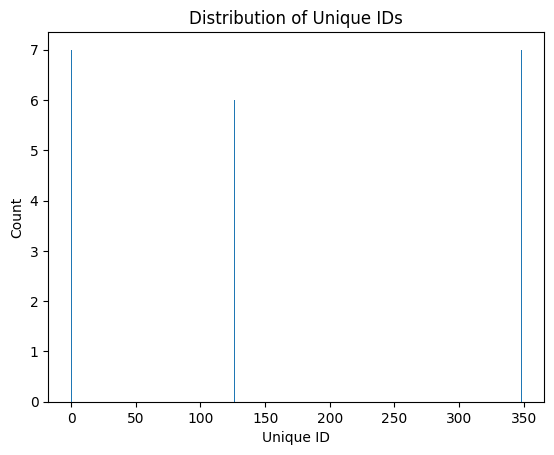

In [383]:
plt.bar(data['unique_id'].value_counts().index, data['unique_id'].value_counts())
plt.title('Distribution of Unique IDs')
plt.xlabel('Unique ID')
plt.ylabel('Count')
plt.show()

### Model Defination

In [384]:
x_y = data[['x_position', 'y_position']].values

In [385]:
x_y

array([[93.35239079, 80.9960561 ],
       [13.38533875, 42.08982701],
       [32.25073888, 80.7105087 ],
       [12.59211233,  6.67324234],
       [30.2276519 , 68.3010502 ],
       [26.60165257, 92.35458795],
       [90.36538436, 29.86096589],
       [ 5.56543197, 46.16019662],
       [64.85350216, 29.3926584 ],
       [19.12735022, 41.94306545],
       [46.99452926, 54.37561351],
       [46.29930763, 70.16516825],
       [41.15933787, 12.63298137],
       [68.88432308,  4.19902595],
       [26.88538151, 15.299364  ],
       [35.41935056,  3.34596054],
       [ 1.35029752, 59.82237567],
       [ 1.30655279, 76.54712175],
       [65.21258645, 58.37934421],
       [61.51681673, 45.64604147]])

In [439]:
dbscan = DBSCAN(eps=1, min_samples=2)
data['cluster_id'] = dbscan.fit_predict(x_y_stand)

In [440]:
print(data['cluster_id'].unique())

[-1  0  1  2]


In [441]:
data

,timestamp,id,x_position,y_position,unique_id,sensor_id,sensor_id_numeric,cluster_id
0,1,1,93.352391,80.996056,126,A,0,-1
1,1,2,13.385339,42.089827,126,B,1,0
2,1,3,32.250739,80.710509,348,C,2,1
3,1,4,12.592112,6.673242,348,D,3,2
4,1,5,30.227652,68.301050,126,E,4,1
5,2,6,26.601653,92.354588,0,A,0,1
6,2,7,90.365384,29.860966,0,B,1,1
7,2,8,5.565432,46.160197,348,C,2,0
8,2,9,64.853502,29.392658,0,D,3,1
9,2,10,19.127350,41.943065,0,E,4,0


In [442]:
grouped_data = data.groupby(['timestamp', 'cluster_id'])

In [443]:
result_data = []

for group_name, group_data in grouped_data:
    f_timestamp, f_id = group_name
    cluster_data = group_data[['x_position', 'y_position', 'sensor_id']].values.tolist()
    f_u_id = group_data['unique_id'] 

    result_data.append({
        'f_timestamp': f_timestamp,
        'f_id': f_id,
        'cluster_data': cluster_data,
        'f_u_id': f_u_id
    })

result = pd.concat([pd.DataFrame(datas) for datas in result_data], ignore_index=True)




In [444]:
result

,f_timestamp,f_id,cluster_data,f_u_id
0,1,-1,"[93.35239079187689, 80.99605609722904, A]",126
1,1,0,"[13.385338752586906, 42.08982701448114, B]",126
2,1,1,"[32.25073888288097, 80.71050870107955, C]",348
3,1,1,"[30.227651901127604, 68.30105020199791, E]",126
4,1,2,"[12.59211232992139, 6.673242338418895, D]",348
5,2,0,"[5.565431969447654, 46.160196619109925, C]",348
6,2,0,"[19.12735022250269, 41.943065445477245, E]",0
7,2,1,"[26.60165257149929, 92.35458794782694, A]",0
8,2,1,"[90.3653843647599, 29.860965889529567, B]",0
9,2,1,"[64.85350216438465, 29.392658396284094, D]",0


In [445]:
result.to_csv('result.csv', index=False)

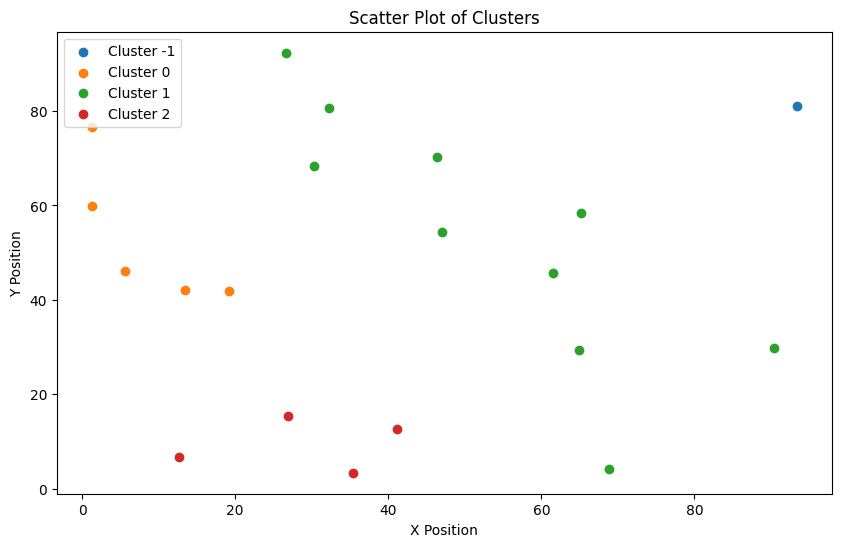

In [446]:
plt.figure(figsize=(10, 6))

for cluster_id, group_data in result.groupby('f_id'):
    plt.scatter(group_data['cluster_data'].apply(lambda x: x[0]),
                group_data['cluster_data'].apply(lambda x: x[1]),
                label=f'Cluster {cluster_id}')

plt.title('Scatter Plot of Clusters')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.show()


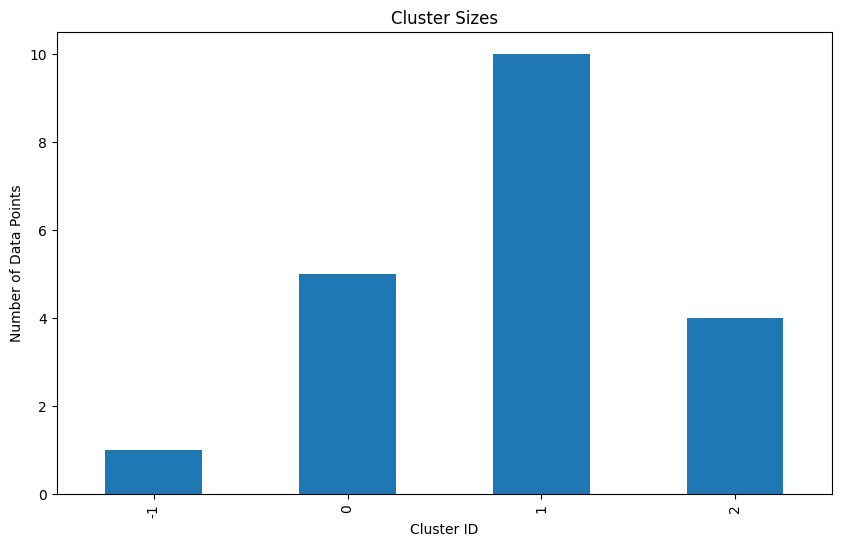

In [447]:
plt.figure(figsize=(10, 6))

result['f_id'].value_counts().sort_index().plot(kind='bar')
plt.title('Cluster Sizes')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Data Points')
plt.show()


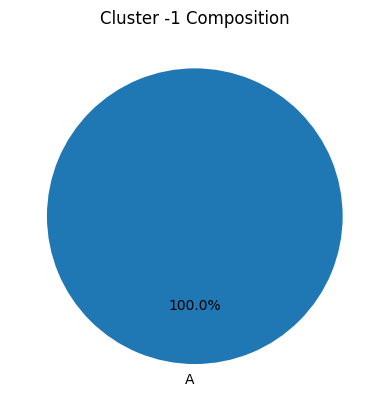

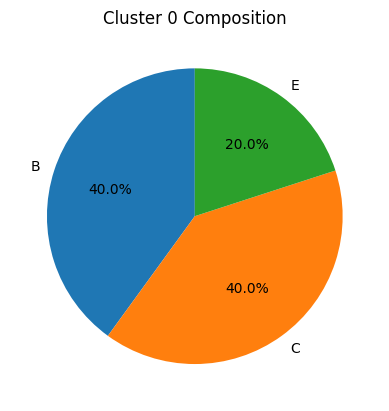

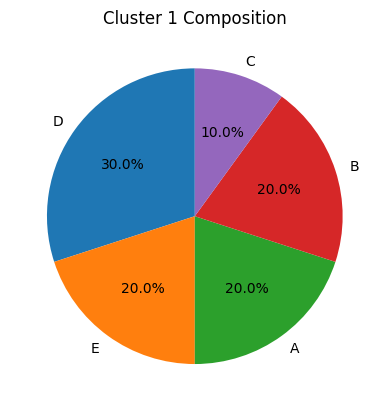

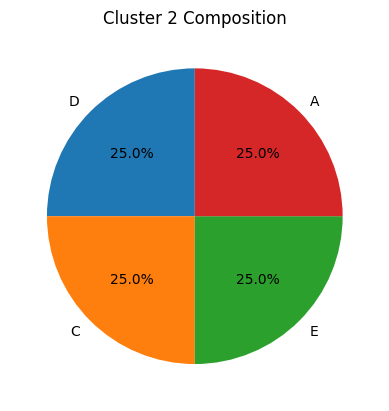

In [449]:
for cluster_id, group_data in result.groupby('f_id'):
    sensor_counts = group_data['cluster_data'].apply(lambda x: x[2]).value_counts()
    plt.pie(sensor_counts, labels=sensor_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Cluster {cluster_id} Composition')
    plt.show()
